In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import cv2
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras import layers
import datetime
# from google.colab import drive
import os
import zipfile
import random
import seaborn as sns
from PIL import Image
# import cv2 as cv
from collections import Counter
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from collections import Counter
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import BatchNormalization, Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical

In [14]:
# Ścieżka do folderu zawierającego podfoldery z obrazami
sciezka_do_folderu = "dataset_sm_fixed/"

# Lista, do której dodamy wczytane obrazy
images = []

# Przechodzenie przez wszystkie podfoldery w głównym folderze
for folder in os.listdir(sciezka_do_folderu):
    # Łączenie ścieżki do podfoldera z głównym folderem
    sciezka_do_podfoldera = os.path.join(sciezka_do_folderu, folder)
    
    # Sprawdzenie, czy ścieżka wskazuje na folder
    if os.path.isdir(sciezka_do_podfoldera):
        print(f"Wczytywanie obrazów z folderu {folder}:")
        
        # Przechodzenie przez pliki w podfolderze
        for plik in os.listdir(sciezka_do_podfoldera):
            # Łączenie ścieżki do pliku z podfolderem
            sciezka_do_pliku = os.path.join(sciezka_do_podfoldera, plik)
            
            # Wczytywanie obrazu
            obraz = cv2.imread(sciezka_do_pliku)
            
            # Sprawdzenie, czy obraz został prawidłowo wczytany
            if obraz is not None:
                # Dodanie obrazu do listy images
                images.append(obraz)
            else:
                print(f"Nie udało się wczytać obrazu: {plik}")

# Wyświetlenie liczby wczytanych obrazów
print(f"Liczba wczytanych obrazów: {len(images)}")

Wczytywanie obrazów z folderu Aerodactyl:
Wczytywanie obrazów z folderu Alakazam:
Wczytywanie obrazów z folderu Articuno:
Wczytywanie obrazów z folderu Bellsprout:
Wczytywanie obrazów z folderu Blastoise:
Wczytywanie obrazów z folderu Bulbasaur:
Wczytywanie obrazów z folderu Chansey:
Wczytywanie obrazów z folderu Charizard:
Wczytywanie obrazów z folderu Charmander:
Wczytywanie obrazów z folderu Diglett:
Wczytywanie obrazów z folderu Ditto:
Wczytywanie obrazów z folderu Dodrio:
Wczytywanie obrazów z folderu Dragonair:
Wczytywanie obrazów z folderu Dratini:
Wczytywanie obrazów z folderu Drowzee:
Wczytywanie obrazów z folderu Eevee:
Wczytywanie obrazów z folderu Gengar:
Wczytywanie obrazów z folderu Geodude:
Wczytywanie obrazów z folderu Gloom:
Wczytywanie obrazów z folderu Golbat:
Wczytywanie obrazów z folderu Golduck:
Wczytywanie obrazów z folderu Golem:
Wczytywanie obrazów z folderu Graveler:
Wczytywanie obrazów z folderu Grimer:
Wczytywanie obrazów z folderu Horsea:
Wczytywanie obrazó

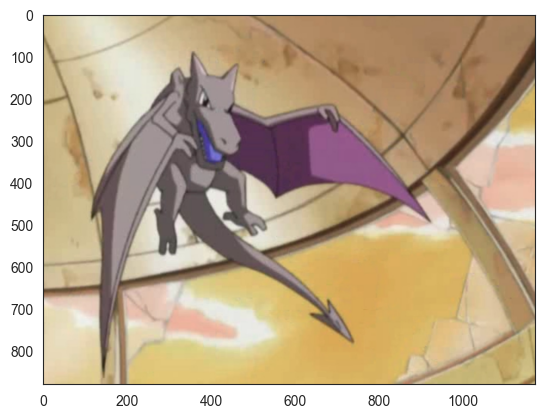

In [15]:
plt.imshow(images[1])

In [16]:
new_size = (224, 224)

# Lista, do której dodamy przeskalowane obrazy
resized_images = []

# Przechodzenie przez wszystkie obrazy w liście images
for image in images:
    # Zmiana rozmiaru obrazu
    resize_image = cv2.resize(image, new_size)
    
    # Dodanie przeskalowanego obrazu do listy resized_images
    resized_images.append(resize_image)

# Wyświetlenie liczby przeskalowanych obrazów
print(f"Liczba przeskalowanych obrazów: {len(resized_images)}")

Liczba przeskalowanych obrazów: 3578


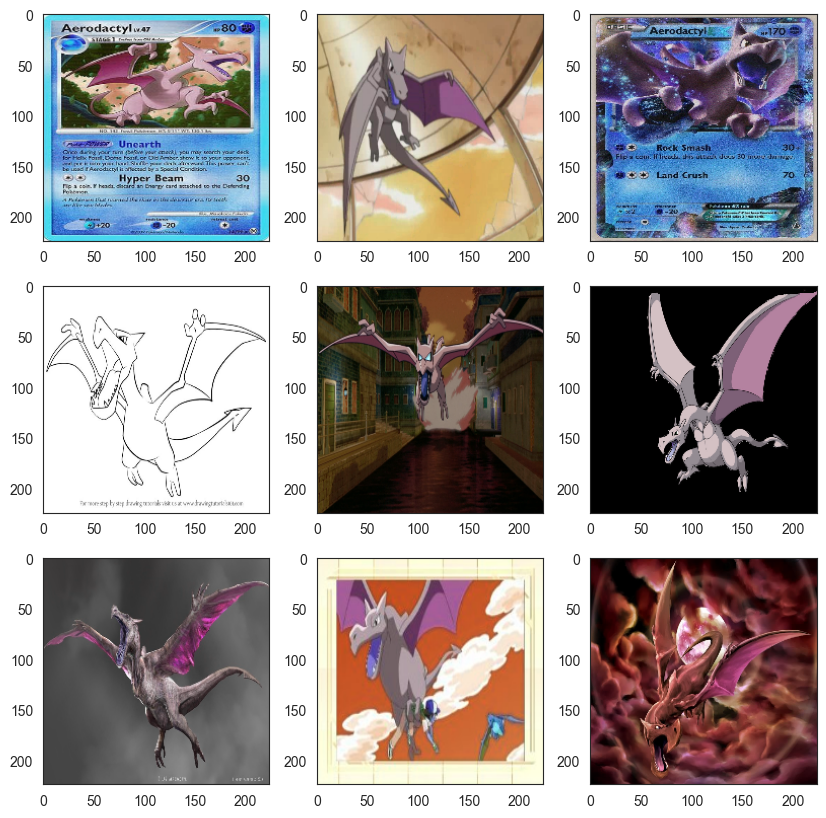

In [17]:
sns.set_style("white")
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    ax.imshow(resized_images[i])

plt.show()

In [18]:
random.shuffle(resized_images)

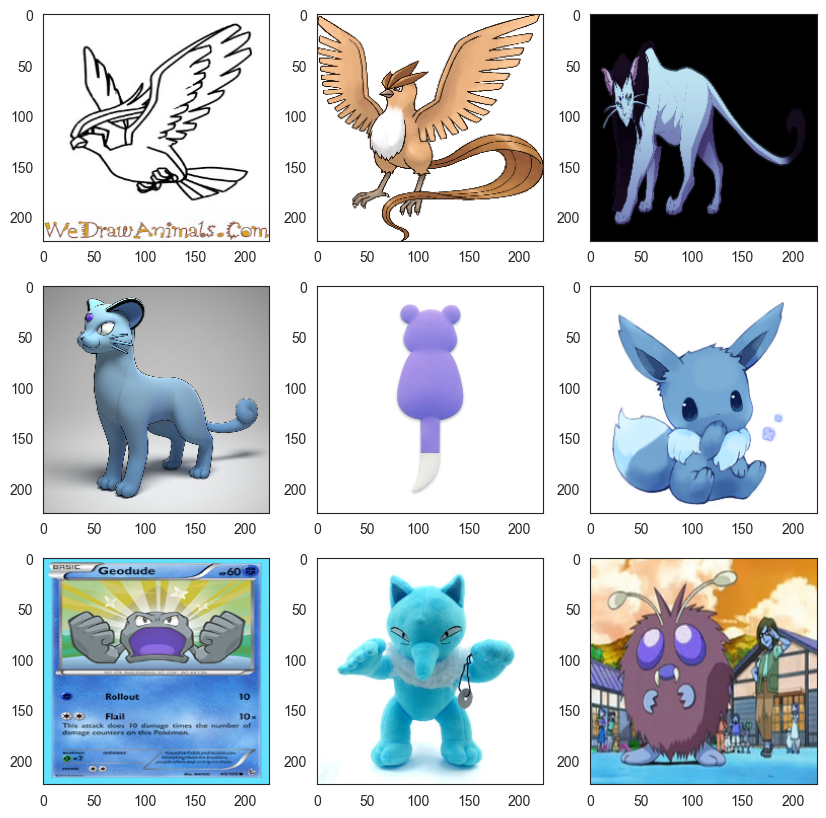

In [19]:
sns.set_style("white")
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    ax.imshow(resized_images[i])

plt.show()

In [24]:
path = "dataset_sm_fixed/"
classes = os.listdir(path)
print(f'Total number of categories: {len(classes)}')

Total number of categories: 72


In [25]:
print(classes[:10])

['Aerodactyl', 'Alakazam', 'Articuno', 'Bellsprout', 'Blastoise', 'Bulbasaur', 'Chansey', 'Charizard', 'Charmander', 'Diglett']


Total number of images in dataset: 3578


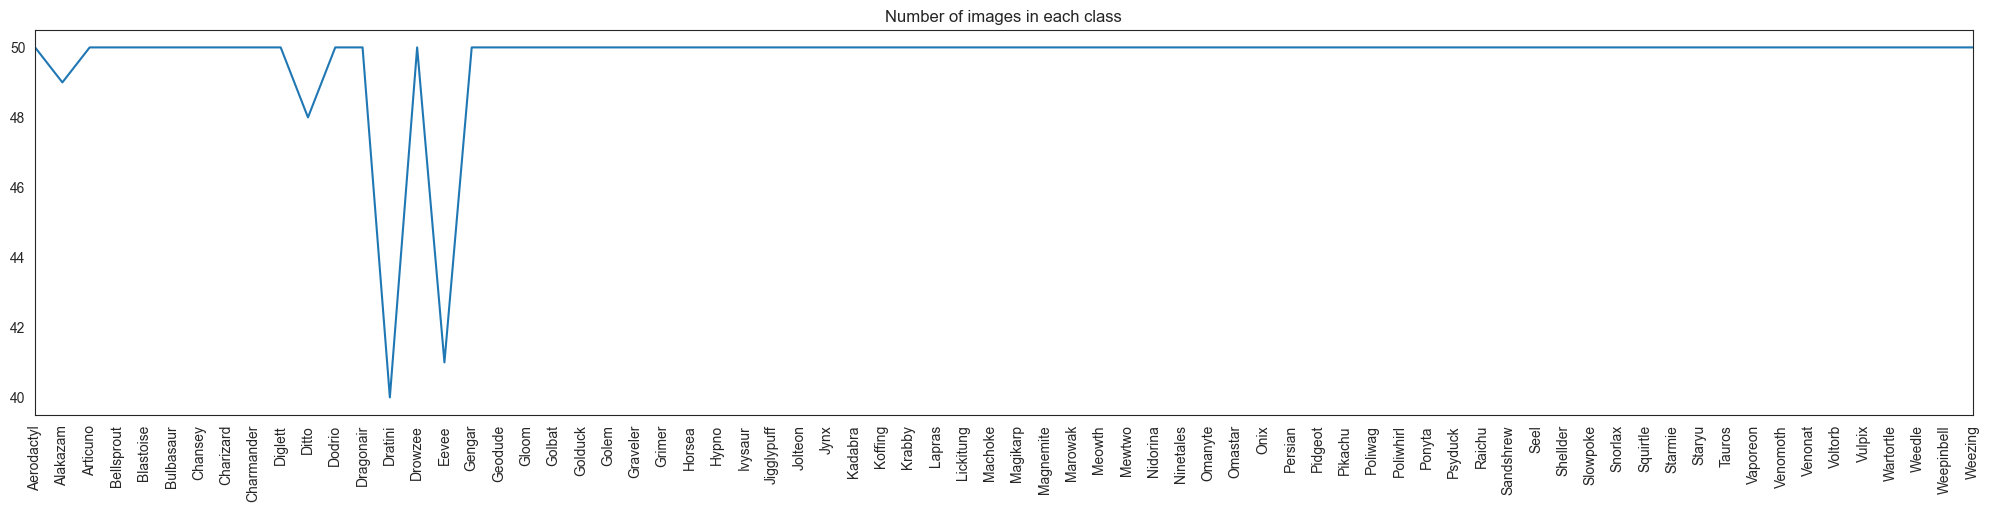

In [26]:
counts = {}
for c in classes:
    counts[c] = len(os.listdir(os.path.join(path, c)))
    
print(f'Total number of images in dataset: {sum(list(counts.values()))}')

# Number of images in each clsss plot
fig = plt.figure(figsize = (25, 5))
sns.lineplot(x = list(counts.keys()), y = list(counts.values())).set_title('Number of images in each class')
plt.xticks(rotation = 90)
plt.margins(x=0)
plt.show()

In [34]:
X = []
Y = []

rozmiar_docelowy = (96, 96)

for indeks, klasa in enumerate(os.listdir(path)):
    # Łączenie ścieżki do podfoldera z głównym folderem
    sciezka_do_podfoldera = os.path.join(path, klasa)
    
    # Sprawdzenie, czy ścieżka wskazuje na folder
    if os.path.isdir(sciezka_do_podfoldera):
        # Przechodzenie przez pliki obrazów w podfolderze
        for plik in os.listdir(sciezka_do_podfoldera):
            # Łączenie ścieżki do pliku z podfolderem
            sciezka_do_pliku = os.path.join(sciezka_do_podfoldera, plik)
            
            # Wczytywanie obrazu
            obraz = cv2.imread(sciezka_do_pliku)
            
            # Sprawdzenie, czy obraz został prawidłowo wczytany
            if obraz is not None:
                # Zmiana rozmiaru obrazu na rozmiar_docelowy
                obraz = cv2.resize(obraz, rozmiar_docelowy)
                # Dodanie obrazu do listy X
                X.append(obraz)
                # Dodanie etykiety do listy Y
                Y.append(indeks)  # Używamy indeksu jako etykiety
                
            else:
                print(f"Nie udało się wczytać obrazu: {plik}")

# Konwersja list do tablic numpy
X = np.array(X)
Y = np.array(Y)

# Wyświetlenie kształtu danych X i Y
print(f"Kształt danych X: {X.shape}")
print(f"Kształt danych Y: {Y.shape}")

Kształt danych X: (3578, 96, 96, 3)
Kształt danych Y: (3578,)


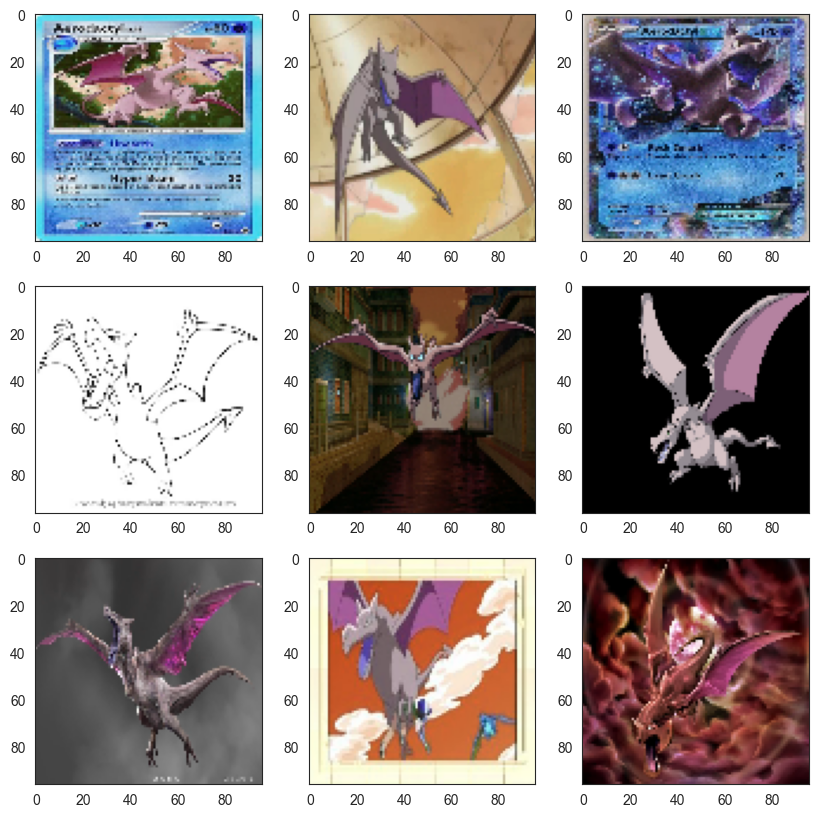

In [35]:
sns.set_style("white")
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    ax.imshow(X[i])

plt.show()

In [36]:
print(Y)

[ 0  0  0 ... 71 71 71]


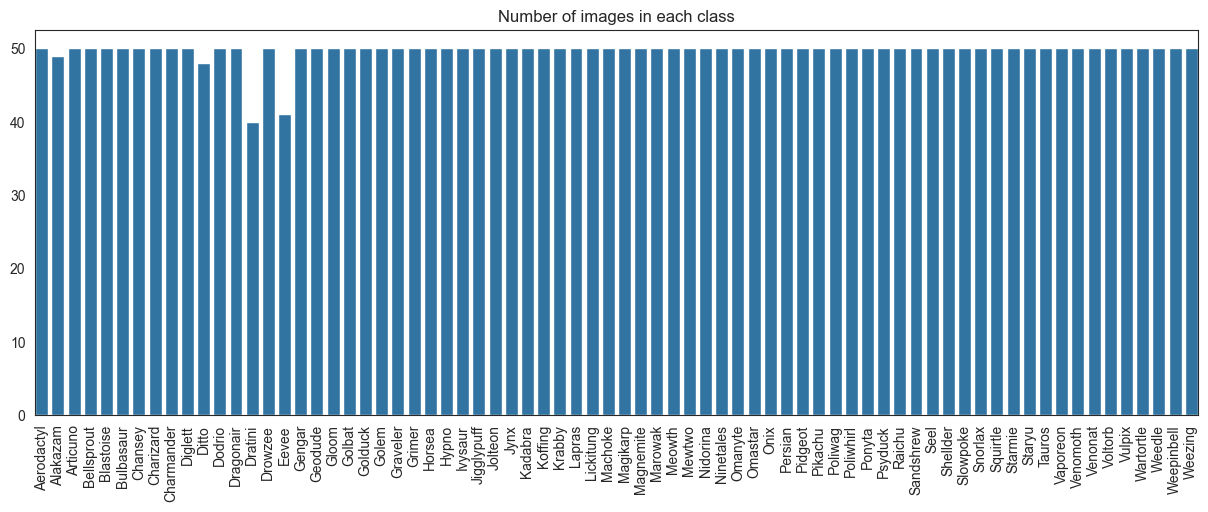

In [37]:
obj = Counter(Y)

fig = plt.figure(figsize = (15, 5))
sns.barplot(x = [classes[i] for i in obj.keys()], y = list(obj.values())).set_title('Number of images in each class')
plt.margins(x=0)
plt.xticks(rotation=90)
plt.show()

In [38]:
X = np.array(X).reshape(-1, 96, 96, 3)

# Scaling data in array
X = X / 255.0

# Convert labels to categorical format
y = to_categorical(Y, num_classes = len(classes))

# Splitting data to train and test datasets
# I'll use these datasets only for training, for final predictions I'll use random pictures from internet
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, shuffle = True, random_state = 666)

In [39]:
datagen = ImageDataGenerator(rotation_range = 45, # Degree range for random rotations
                            zoom_range = 0.2, # Range for random zoom 
                            horizontal_flip = True, # Randomly flip inputs horizontally
                            width_shift_range = 0.15, # Range for horizontal shift 
                            height_shift_range = 0.15, # Range for vertical shift 
                            shear_range = 0.2) # Shear Intensity

datagen.fit(X_train)

In [40]:
model = Sequential()
model.add(Conv2D(32, 3, padding = 'same', activation = 'relu', input_shape =(96, 96, 3), kernel_initializer = 'he_normal'))
model.add(BatchNormalization(axis = -1))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(Conv2D(128, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(Conv2D(256, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(len(classes), activation = 'softmax'))


f:\Programy\Conda\envs\Python_intro\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [42]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [43]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 96, 96, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 96, 96, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 48, 48, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 48, 48, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 6,038,728 (23.04 MB)

 Trainable params: 6,035,336 (23.02 MB)

 Non-trainable params: 3,392 (13.25 KB)

In [44]:
history = model.fit(datagen.flow(X_train, y_train, batch_size = 32), epochs = 70, validation_data = [X_test, y_test],
                             steps_per_epoch=len(X_train) // 32)

Epoch 1/70


f:\Programy\Conda\envs\Python_intro\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


89/89 ━━━━━━━━━━━━━━━━━━━━ 15s 131ms/step - accuracy: 0.0155 - loss: 5.5297 - val_accuracy: 0.0196 - val_loss: 6.2963
Epoch 2/70
 1/89 ━━━━━━━━━━━━━━━━━━━━ 10s 117ms/step - accuracy: 0.0312 - loss: 5.1640

f:\Programy\Conda\envs\Python_intro\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0312 - loss: 2.6110 - val_accuracy: 0.0223 - val_loss: 6.1558
Epoch 3/70
89/89 ━━━━━━━━━━━━━━━━━━━━ 11s 123ms/step - accuracy: 0.0283 - loss: 4.8662 - val_accuracy: 0.0349 - val_loss: 4.5295
Epoch 4/70
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0000e+00 - loss: 2.3128 - val_accuracy: 0.0363 - val_loss: 4.4705
Epoch 5/70
89/89 ━━━━━━━━━━━━━━━━━━━━ 11s 122ms/step - accuracy: 0.0576 - loss: 4.3226 - val_accuracy: 0.0615 - val_loss: 4.1661
Epoch 6/70
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1250 - loss: 1.9455 - val_accuracy: 0.0559 - val_loss: 4.1432
Epoch 7/70
89/89 ━━━━━━━━━━━━━━━━━━━━ 11s 123ms/step - accuracy: 0.0671 - loss: 4.1339 - val_accuracy: 0.0978 - val_loss: 3.6681
Epoch 8/70
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0938 - loss: 1.9838 - val_accuracy: 0.0992 - val_loss: 3.6834
Epoch 9/70
89/89 ━━━━━━━━━━━━━━━━━━━━ 11s 123ms/step - accuracy: 0.0992 - loss: 3.8359 - val_accuracy: 0.1341 - val_

Text(0.5, 1.0, 'loss')

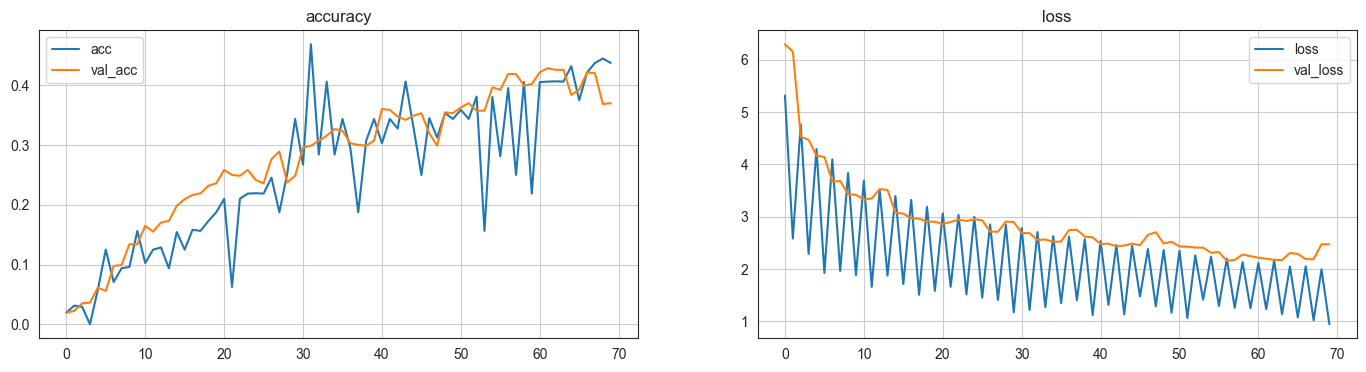

In [45]:
fig = plt.figure(figsize = (17, 4))
    
plt.subplot(121)
plt.plot(history.history['accuracy'], label = 'acc')
plt.plot(history.history['val_accuracy'], label = 'val_acc')
plt.legend()
plt.grid()
plt.title(f'accuracy')

plt.subplot(122)
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()
plt.grid()
plt.title(f'loss')

In [1]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.01, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X, y, verbose=2)

NameError: name 'plt' is not defined